# Démonstration des données du projet

## Import des bibliothèques

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Récupération des données

In [34]:
data_path = 'DataframeConsolider.csv'
data = pd.read_csv(data_path)

## 1ere Visualisation - Répartition des Vulnérabilités par Gravité

Le graphique représente la répartition des vulnérabilités selon leur gravité (Critique, Élevée, Moyenne, Faible, Inconnue) sous forme de diagramme circulaire. Chaque segment du diagramme correspond à un pourcentage du total des vulnérabilités

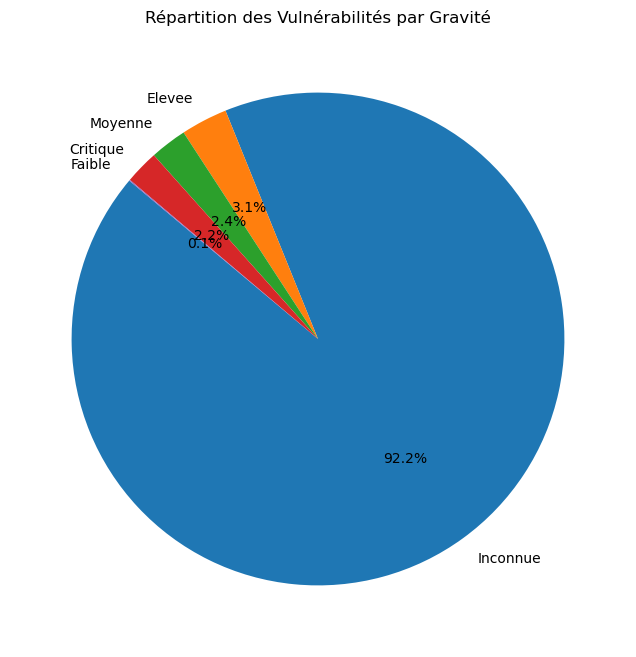

In [37]:
if 'Gravite' in data.columns:
    severity_counts = data['Gravite'].dropna().value_counts()
    if not severity_counts.empty:
        plt.figure(figsize=(8, 8))
        severity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
        plt.title('Répartition des Vulnérabilités par Gravité')
        plt.ylabel('')
        plt.show()
    else:
        print("La colonne 'Gravite' est vide après suppression des valeurs manquantes.")
else:
    print("La colonne 'Gravite' n'existe pas dans le fichier CSV.")

L'observation principale est que la majorité des vulnérabilités (92,2 %) sont classées dans la catégorie "Inconnue", ce qui rend difficile une analyse détaillée des niveaux de gravité. Parmi les données restantes, les vulnérabilités avec une gravité Élevée représentent 3,1 %, suivies de Moyenne (2,4 %), Critique (2,4 %), et Faible (0,4 %).

## 2eme Visualisation - Répartition des Vulnérabilités par Gravité sans les inconnues

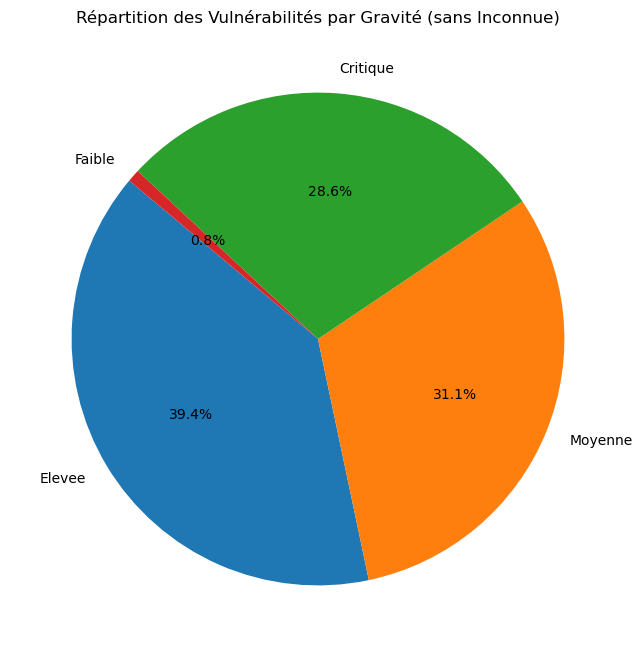

In [39]:
filtered_data = data[data['Gravite'] != 'Inconnue']
severity_counts = filtered_data['Gravite'].value_counts()
plt.figure(figsize=(8, 8))
severity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Vulnérabilités par Gravité (sans Inconnue)')
plt.ylabel('')
plt.show()

En supprimant la catégorie "Inconnue", l'analyse devient plus précise et met en évidence que la majorité des vulnérabilités connues sont classées comme "Élevée" (39,4 %), suivies de près par les vulnérabilités de gravité "Moyenne" (31,1 %) et "Critique" (28,6 %). Les vulnérabilités de gravité "Faible" sont marginales (0,8 %), ce qui pourrait indiquer que les vulnérabilités avec un impact moindre sont rarement signalées ou documentées.

## 3eme Visualisation - Dstribution des scores CVSS 

Le graphique montre la distribution des scores CVSS (Common Vulnerability Scoring System) des vulnérabilités. Les scores CVSS, allant de 0 à 10, mesurent la gravité des vulnérabilités. Chaque barre représente la fréquence des vulnérabilités pour une plage spécifique de scores.

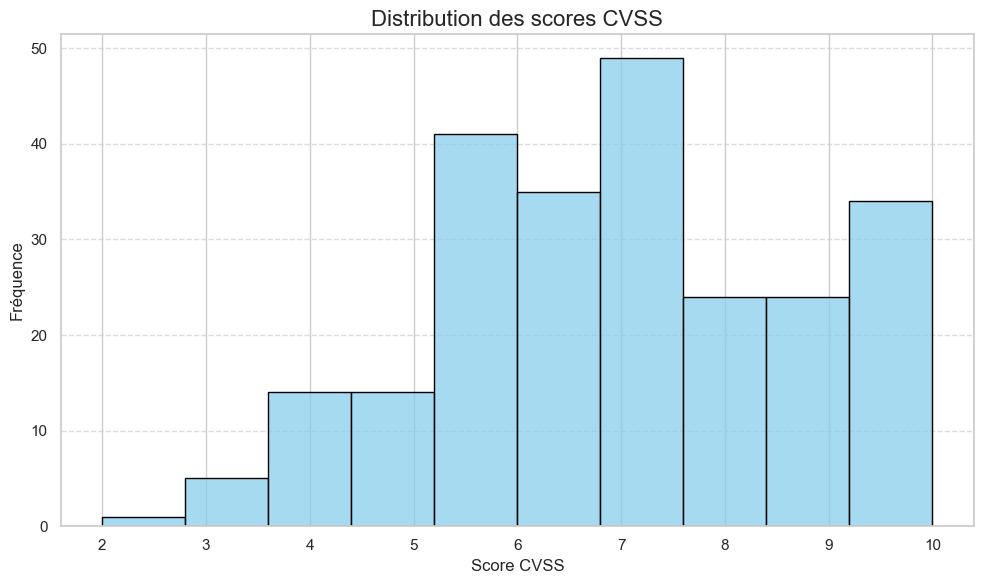

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['Cvss_score'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution des scores CVSS", fontsize=16)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La distribution des scores CVSS révèle que la majorité des vulnérabilités ont des scores compris entre 5 et 7, avec un pic notable pour les scores de 7, indiquant une gravité modérée à élevée. Cela suggère que la plupart des vulnérabilités analysées nécessitent une attention significative en raison de leur impact potentiel.

On remarque également une présence non négligeable de vulnérabilités ayant des scores proches de 10, représentant les cas les plus critiques. La faible fréquence des scores inférieurs à 5 montre que les vulnérabilités de faible gravité sont rares ou peu signalées dans cet ensemble de données.

## 4eme Visualisation - Top 5 des vendeurs avec le plus de vulnérabilités

Ce graphique montre le top 5 des vendeurs ayant signalé le plus grand nombre de vulnérabilités. L'axe des abscisses représente les vendeurs, tandis que l'axe des ordonnées indique le nombre de vulnérabilités rapportées.

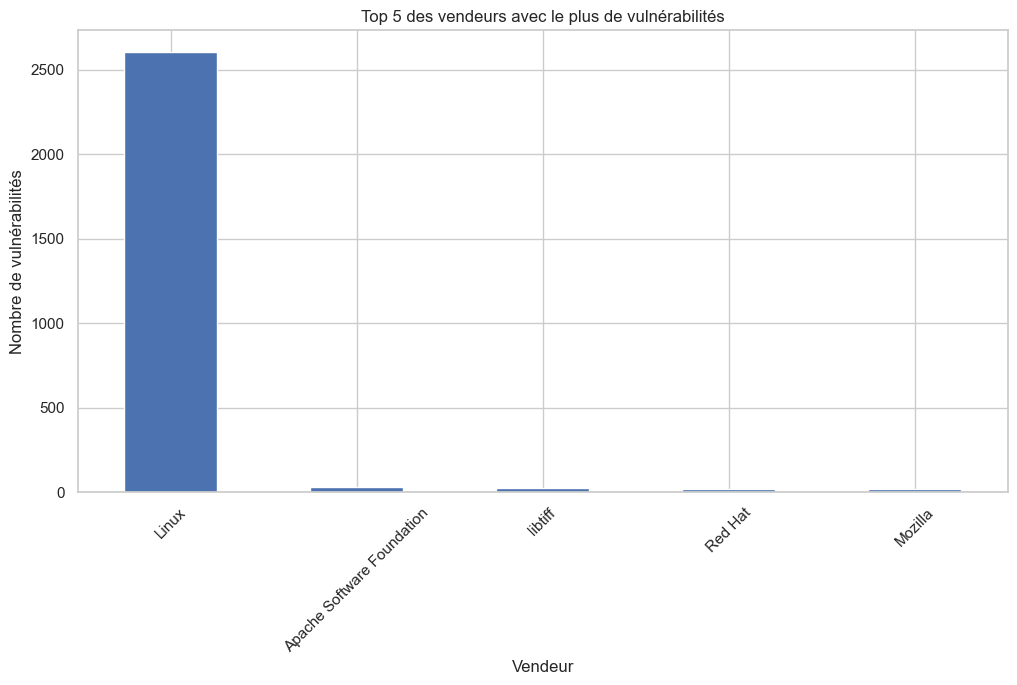

In [45]:
plt.figure(figsize=(12, 6))
data['Vendor'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 des vendeurs avec le plus de vulnérabilités')
plt.xlabel('Vendeur')
plt.ylabel('Nombre de vulnérabilités')
plt.xticks(rotation=45)
plt.show()

La prédominance de Linux dans ce graphique peut être attribuée à son statut de système d'exploitation open source largement utilisé, avec une communauté qui signale activement les vulnérabilités. Ce haut volume pourrait également refléter la transparence du projet Linux en matière de divulgation de vulnérabilités.

## 5eme Visualisation - Top 10 des types de CWE

Ce graphique illustre le top 10 des types de CWE associés aux vulnérabilités. L'axe horizontal indique le nombre de vulnérabilités, et l'axe vertical liste les types de CWE.

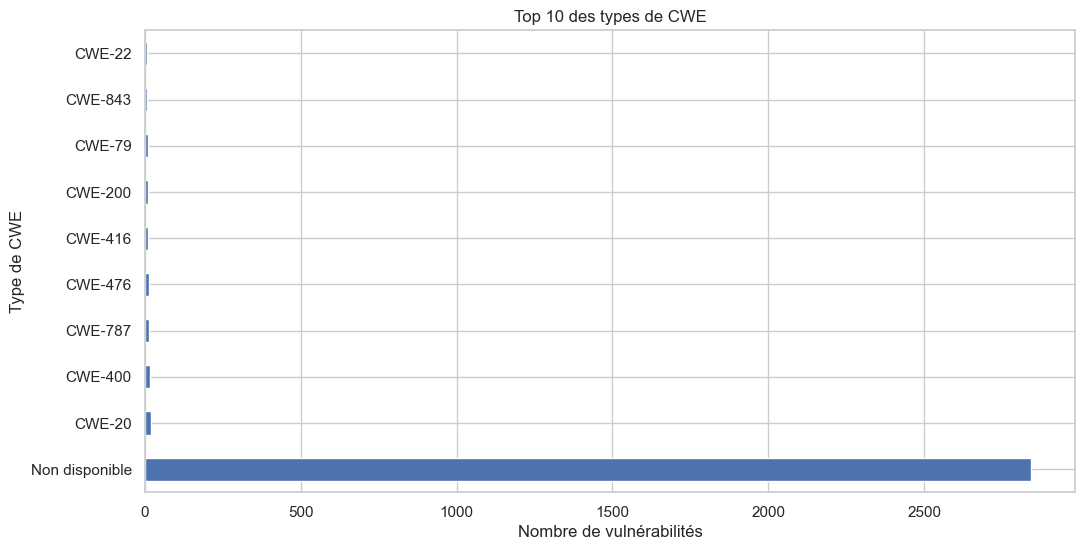

In [47]:
plt.figure(figsize=(12, 6))
data['CWE'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 des types de CWE')
plt.xlabel('Nombre de vulnérabilités')
plt.ylabel('Type de CWE')
plt.show()

La prévalence de la catégorie "Non disponible" indique qu'une proportion significative de vulnérabilités n'a pas de type CWE spécifié. Cela reflète soit un manque de données, soit des lacunes dans la classification ou l'analyse des vulnérabilités. Il serait plus pertinent d'ignorer la valeur 'Non disponible' pour une meilleur lecture de donnée.

## 6eme Visualisation - Top 10 des types de CWE (uniquement les disponibles)

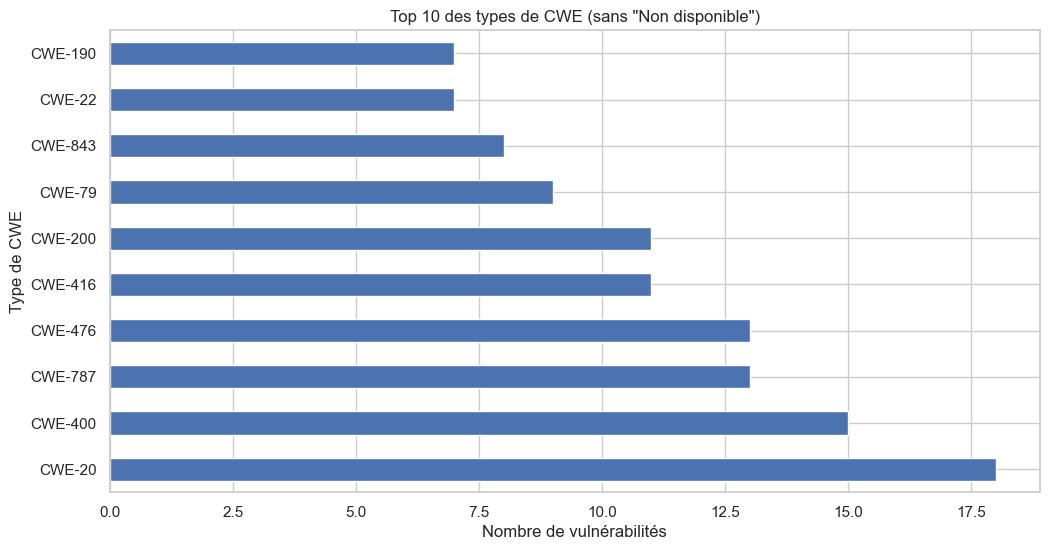

In [49]:
plt.figure(figsize=(12, 6))
df_filtered = data[data['CWE'] != 'Non disponible']
df_filtered['CWE'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 des types de CWE (sans "Non disponible")')
plt.xlabel('Nombre de vulnérabilités')
plt.ylabel('Type de CWE')
plt.show()

Une fois la catégorie "Non disponible" exclue, CWE-20 (Input Validation) ressort comme le type de vulnérabilité le plus fréquent, suivi de CWE-400 (Resource Exhaustion) et CWE-787 (Out-of-Bounds Write). Ces types représentent des failles critiques souvent exploitées dans des attaques graves comme les dépassements de mémoire tampon ou les attaques par déni de service. 

## 7eme Visualisation - Vulnérabilités Prioritaires par Editeur

Ce graphique représente le nombre de vulnérabilités prioritaires par éditeur, en se basant sur deux critères : un score CVSS supérieur ou égal à 9 (indiquant une gravité critique) et un score EPSS supérieur à 0,7 (indiquant une probabilité élevée d'exploitation).

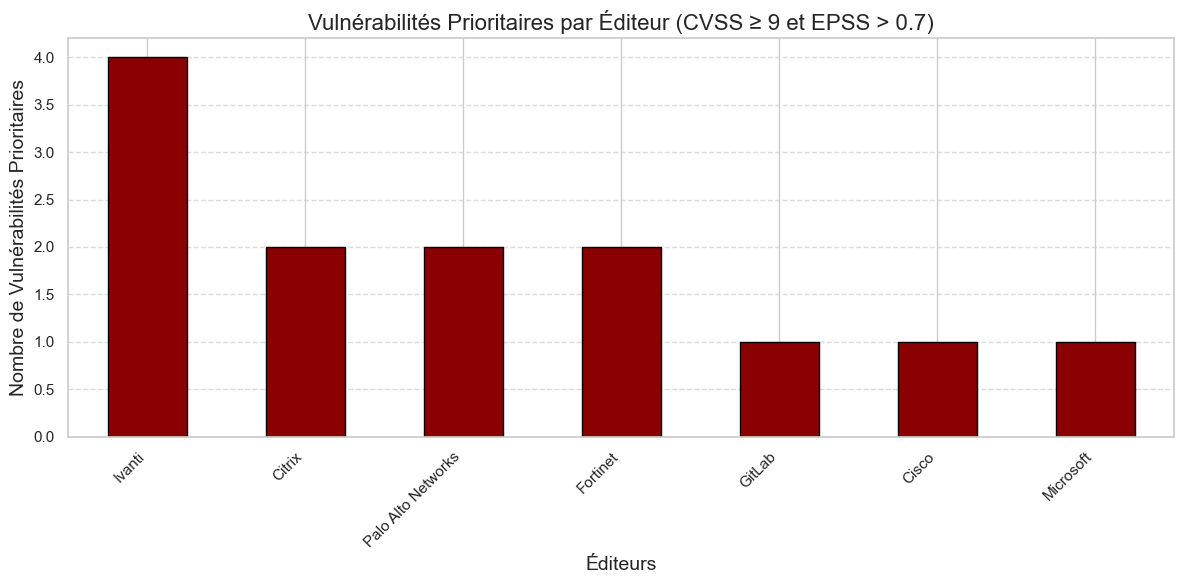

In [75]:
data['Epss_score'] = pd.to_numeric(data['Epss_score'], errors='coerce')
priority_vulnerabilities = data[(data['Cvss_score'] >= 9) & (data['Epss_score'] > 0.7)]
priority_vendors = priority_vulnerabilities['Vendor'].value_counts()
plt.figure(figsize=(12, 6))
priority_vendors.plot(kind='bar', color='darkred', edgecolor='black')
plt.title("Vulnérabilités Prioritaires par Éditeur (CVSS ≥ 9 et EPSS > 0.7)", fontsize=16)
plt.xlabel("Éditeurs", fontsize=14)
plt.ylabel("Nombre de Vulnérabilités Prioritaires", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


L'éditeur Ivanti se démarque avec le plus grand nombre de vulnérabilités prioritaires (4), suivi par Citrix, Palo Alto Networks, et Fortinet, chacun ayant 2 vulnérabilités prioritaires. Les éditeurs GitLab, Cisco, et Microsoft ont chacun 1 vulnérabilité prioritaire.

Ces résultats soulignent que certaines entreprises comme Ivanti et Citrix sont particulièrement exposées à des vulnérabilités critiques et exploitables, nécessitant une attention immédiate pour atténuer les risques associés.

## 8eme Visualisation - Mots-Clés Critiques dans les descriptions de Vulnérabilités

Ce graphique présente la fréquence d'apparition de mots-clés critiques dans les descriptions des vulnérabilités. Les mots-clés, tels que "remote", "bypass", "execution", "injection", "overflow", et "disclosure", ont été sélectionnés pour leur pertinence dans la sécurité informatique. Chaque barre correspond au nombre de fois où un mot-clé a été détecté dans les descriptions.

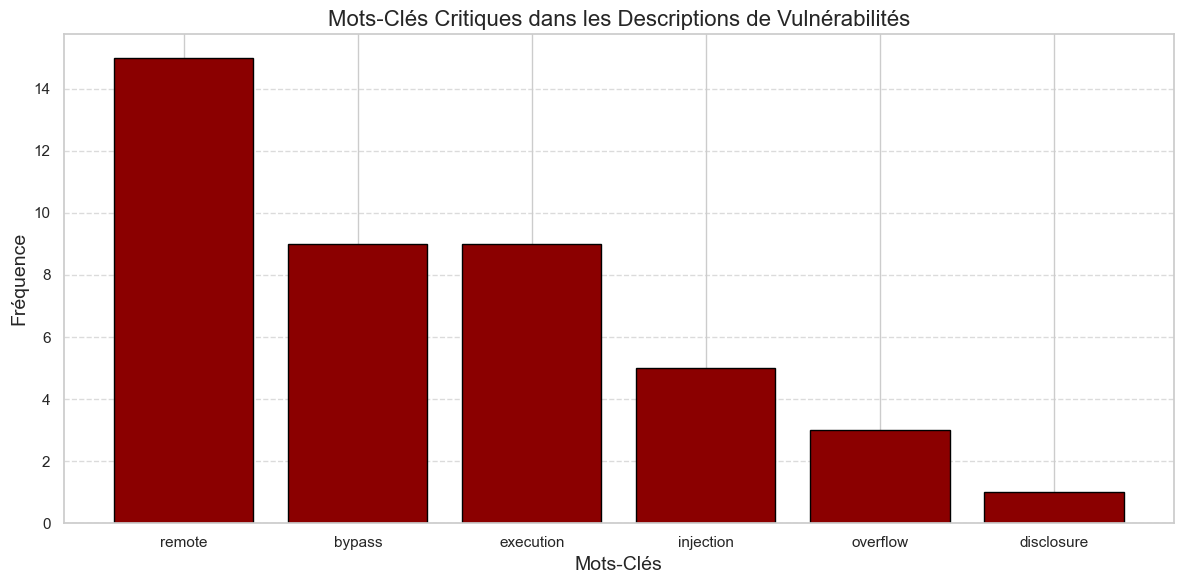

In [55]:
data['Description'] = data['Description'].fillna('')
keywords = ['remote', 'execution', 'disclosure', 'bypass', 'injection', 'overflow', 'leak']
data['Contains_Keywords'] = data['Description'].str.contains('|'.join(keywords), case=False, na=False)
critical_vulnerabilities = data[(data['Cvss_score'] >= 9) & (data['Contains_Keywords'])]
all_keywords = []
for description in critical_vulnerabilities['Description']:
    words = description.lower().split()
    matched_keywords = [word for word in words if word in keywords]
    all_keywords.extend(matched_keywords)

keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(10)
keywords_df = pd.DataFrame(top_keywords, columns=['Mot-Clé', 'Fréquence'])

plt.figure(figsize=(12, 6))
plt.bar(keywords_df['Mot-Clé'], keywords_df['Fréquence'], color='darkred', edgecolor='black')
plt.title("Mots-Clés Critiques dans les Descriptions de Vulnérabilités", fontsize=16)
plt.xlabel("Mots-Clés", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Le mot-clé "remote" est le plus fréquent, apparaissant dans plus de 14 descriptions de vulnérabilités, suivi de "bypass" et "execution", qui montrent également des occurrences élevées. Ces termes reflètent des vulnérabilités associées à des attaques critiques, telles que l'exécution de code à distance, le contournement de sécurité ou l'exploitation à distance.

Les mots "injection" et "overflow" signalent des failles courantes comme les attaques par injection (ex. SQL ou commande) et les dépassements de tampon, qui peuvent entraîner des conséquences graves telles que des violations de données ou des pannes de service. Enfin, "disclosure" (divulgation) fait référence à des failles pouvant exposer des informations sensibles.